In [100]:
import numpy as np
import pandas as pd

In [101]:
mola = pd.read_csv("rigidez.csv", sep = ";" )

In [102]:
mola

,cargas,forca,Lo,L,x,K
0,1,0.10,27.0,29.90,0.00290,34.48
1,2,0.15,27.0,31.30,0.00430,34.88
2,3,0.18,27.0,NaN,NaN,NaN
3,4,0.23,27.0,34.00,0.00700,32.86
4,5,0.31,27.0,35.53,0.00850,36.34
5,6,0.45,27.0,41.40,0.01440,31.25
6,7,0.55,27.0,44.20,0.01720,31.98
7,8,0.68,27.0,47.20,0.02020,33.66
8,9,0.72,27.0,50.00,0.02300,31.30
9,10,0.83,27.0,51.90,0.02490,33.33


In [103]:
mola.shape

(30, 6)

In [104]:
mola.columns

Index(['cargas', 'forca', 'Lo', 'L', 'x', 'K'], dtype='object')

In [105]:
novas_colunas = ["cargas","forca","compr_inicial","compr_final","deformacao","regidez"]

In [106]:
mola.columns = novas_colunas

In [107]:
mola.head(5)

,cargas,forca,compr_inicial,compr_final,deformacao,regidez
0,1,0.10,27.0,29.90,0.0029,34.48
1,2,0.15,27.0,31.30,0.0043,34.88
2,3,0.18,27.0,NaN,NaN,NaN
3,4,0.23,27.0,34.00,0.0070,32.86
4,5,0.31,27.0,35.53,0.0085,36.34


In [129]:
mola.dtypes

cargas             int64
forca            float64
compr_inicial    float64
compr_final      float64
deformacao       float64
regidez          float64
dtype: object

## Tratamento dos dados

In [128]:
mola.isnull().sum()

cargas           0
forca            0
compr_inicial    0
compr_final      0
deformacao       0
regidez          0
dtype: int64

In [110]:
mola = mola.dropna()

In [111]:
mola.columns

Index(['cargas', 'forca', 'compr_inicial', 'compr_final', 'deformacao',
       'regidez'],
      dtype='object')

In [112]:
mola_trat = mola[['cargas', 'forca','compr_final', 'deformacao','regidez']]

In [113]:
mola_trat

,cargas,forca,compr_final,deformacao,regidez
0,1,0.10,29.90,0.00290,34.48
1,2,0.15,31.30,0.00430,34.88
3,4,0.23,34.00,0.00700,32.86
4,5,0.31,35.53,0.00850,36.34
5,6,0.45,41.40,0.01440,31.25
6,7,0.55,44.20,0.01720,31.98
7,8,0.68,47.20,0.02020,33.66
8,9,0.72,50.00,0.02300,31.30
9,10,0.83,51.90,0.02490,33.33
10,11,1.05,58.00,0.03100,33.87


In [114]:
import plotly.express as px

In [115]:
boxplot = px.box(mola_trat, y="forca" )
boxplot.show()

In [116]:
boxplot = px.box(mola_trat, y="deformacao" )
boxplot.show()

In [117]:
mola_trat.loc[mola_trat["deformacao"] == 1.891]

,cargas,forca,compr_final,deformacao,regidez
28,29,3.1,1918.0,1.891,1.64


In [118]:
mola_trat["deformacao"].loc[28]

1.891

In [119]:
mola_trat["deformacao"].loc[28] = (mola_trat["deformacao"].loc[27] + mola_trat["deformacao"].loc[29])/2

C:\Users\Ezequiel Santana\AppData\Local\Temp\ipykernel_12496\3554451743.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [120]:
boxplot = px.box(mola_trat, y="deformacao" )
boxplot.show()

In [122]:
boxplot = px.box(mola_trat, y="regidez")
boxplot.show()

In [123]:
mola_trat["regidez"].loc[28] = (mola_trat["regidez"].loc[27] + mola_trat["regidez"].loc[29])/2

C:\Users\Ezequiel Santana\AppData\Local\Temp\ipykernel_12496\2273175136.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [125]:
boxplot = px.box(mola_trat, y="regidez")
boxplot.show()

In [126]:
mola_trat["compr_final"].loc[28] = (mola_trat["compr_final"].loc[27] + mola_trat["compr_final"].loc[29])/2

C:\Users\Ezequiel Santana\AppData\Local\Temp\ipykernel_12496\1256608228.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [127]:
mola_trat

,cargas,forca,compr_final,deformacao,regidez
0,1,0.10,29.90,0.00290,34.480
1,2,0.15,31.30,0.00430,34.880
3,4,0.23,34.00,0.00700,32.860
4,5,0.31,35.53,0.00850,36.340
5,6,0.45,41.40,0.01440,31.250
6,7,0.55,44.20,0.01720,31.980
7,8,0.68,47.20,0.02020,33.660
8,9,0.72,50.00,0.02300,31.300
9,10,0.83,51.90,0.02490,33.330
10,11,1.05,58.00,0.03100,33.870


## ANALISE DE CORRELAÇÃO

In [132]:
mola_trat.shape

(29, 5)

In [133]:
import matplotlib.pyplot as plt

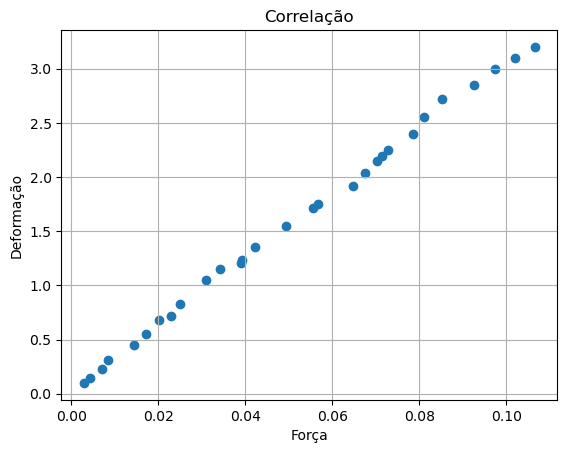

In [148]:
plt.scatter(mola_trat.deformacao,mola_trat.forca) #primeiro eu coloca a variavel independente e depois a dependente
plt.title("Correlação")
plt.xlabel("Força")
plt.ylabel("Deformação")
plt.grid(True)
plt.show()

In [149]:
#Fazendo a correlação de todas as variaveis através do Seaborn
import seaborn as sns

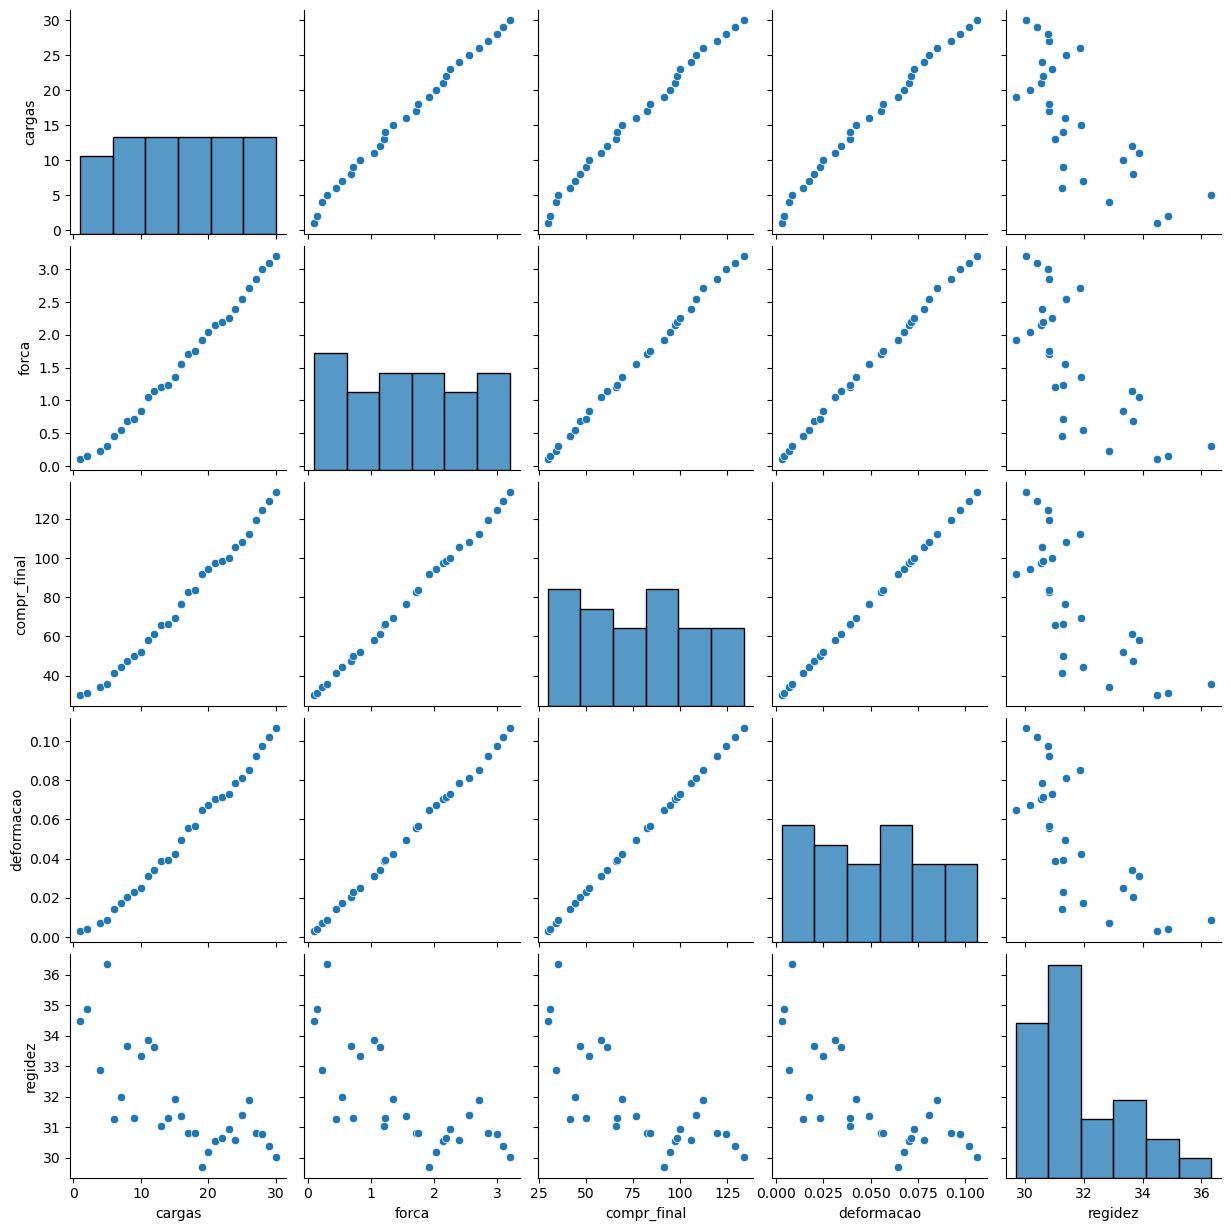

In [150]:
sns.pairplot(mola_trat)

In [ ]:
## Antes de fazer a análise do tipo de correlação :
""" 
Correlação de Spearman: A correlação de Spearman é uma medida de correlação não paramétrica que avalia a relação entre duas variáveis ordinais ou de intervalo/ratio. Ela calcula a correlação classificando os dados em ordem crescente e comparando as posições relativas das observações. A correlação de Spearman é adequada quando a relação entre as variáveis não é linear ou quando os dados apresentam valores discrepantes.

Correlação de Pearson: A correlação de Pearson é uma medida de correlação paramétrica que avalia a relação linear entre duas variáveis contínuas. Ela mede a força e a direção dessa relação através do coeficiente de correlação de Pearson, que varia de -1 a 1. Um valor próximo de 1 indica uma forte correlação positiva, um valor próximo de -1 indica uma forte correlação negativa, e um valor próximo de 0 indica uma ausência de correlação linear.

Correlação de Kendall: A correlação de Kendall é uma medida de correlação não paramétrica que avalia a relação entre duas variáveis ordinais. Ela também é conhecida como coeficiente de concordância de Kendall. A correlação de Kendall considera os pares de observações e mede a concordância ou discordância das classificações entre as variáveis. É especialmente útil quando as variáveis possuem empates (empates ocorrem quando duas ou mais observações têm o mesmo valor para uma ou ambas as variáveis).

É importante escolher o tipo de correlação adequado com base nas características dos dados e na natureza das variáveis envolvidas. Cada tipo de correlação tem suas próprias suposições e é adequado para diferentes tipos de dados e relações entre variáveis.
"""
 #Para a definição do tipo de correlçaõ fazemos o teste de normalidade
""" Se passar no teste de normalidade usamos o coeficiente de pearson , se não , ou sperarman ou Kendal """ 

## Análise de normalidade QQPLOT

In [151]:
import scipy.stats as stats

<function matplotlib.pyplot.show(close=None, block=None)>

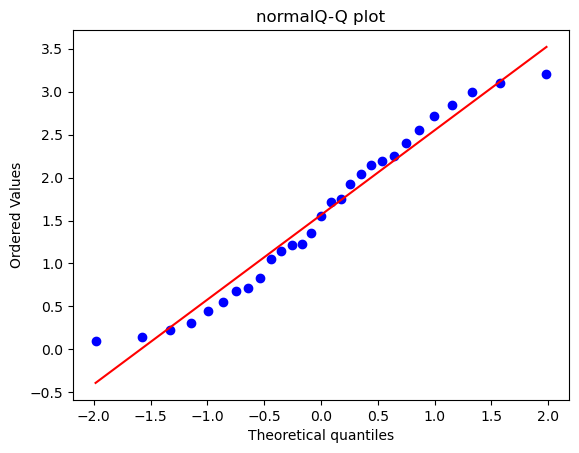

In [161]:
stats.probplot(mola_trat["forca"], dist="norm", plot = plt)
plt.title("normalQ-Q plot")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

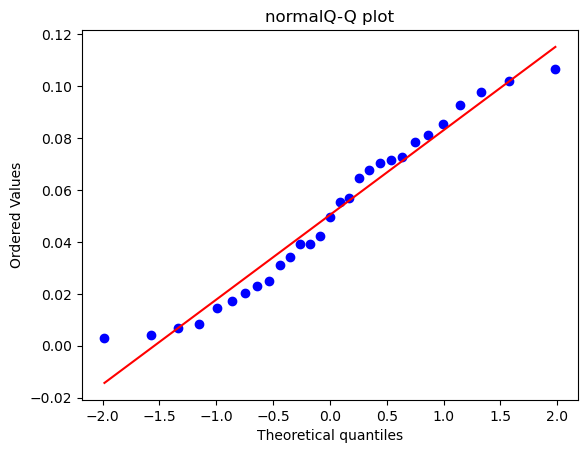

In [160]:
stats.probplot(mola_trat["deformacao"], dist="norm", plot = plt)
plt.title("normalQ-Q plot")
plt.show

In [ ]:
""" Teste Shapiro-Wilk : 
Ho = distribuição normal : p > 0.05 -> Hipótese nula
Ha = distribuição != normal : p <= 0.05 -> Hipótese alternativa

significa que a distribuição vai ser normal se o resultado for maior que 0.05 
se o resultado for menor ou igual a 0,05 a distribuição não é normal 
"""

In [165]:
stats.shapiro(mola_trat.forca)

ShapiroResult(statistic=0.9525033235549927, pvalue=0.21247969567775726)

In [166]:
#obs: o resultado é este aqui pvalue=0.21247969567775726 , neste caso maior do que 0,05 então distribuição normal 

In [168]:
stats.shapiro(mola_trat.forca) #Observe que o resultado é menor que 0,05 então a distribuição não é normal  assim como vimos nos gráficos

ShapiroResult(statistic=0.8819283246994019, pvalue=0.0037163514643907547)

## Correlação linear

In [ ]:
"""
Pearson (distribuição normal)
Spearman (distribuição não normal)
Kendall (distribuição não normal com quantidade pequena de amostras)

Ho = não há corrrelação linear: p > 0,05

Ha = existe correlação linear: p <= 0,05
"""

In [185]:
#pearson 
coef,p = stats.pearsonr(mola_trat.deformacao,mola_trat.forca)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: 0.9991513897483921
p-valor: 6.047272380693601e-39


In [175]:
# Spearman
coef,p = stats.spearmanr(mola_trat.deformacao,mola_trat.forca)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: 0.9999999999999998
p-valor: 8.376948343984638e-209


In [176]:
# Kendall
coef,p = stats.kendalltau(mola_trat.deformacao,mola_trat.forca)
print('Coeficiente de correlação: {}'.format(coef))
print('p-valor: {}'.format(p))

Coeficiente de correlação: 0.9999999999999998
p-valor: 2.2619925772895436e-31


'\ncorr() retorna a matriz de correlação entre as variáveis do DataFrame especificado. Por padrão,\nessa matriz de correlação é calculada usando o coeficiente de correlação de Pearson.\n'

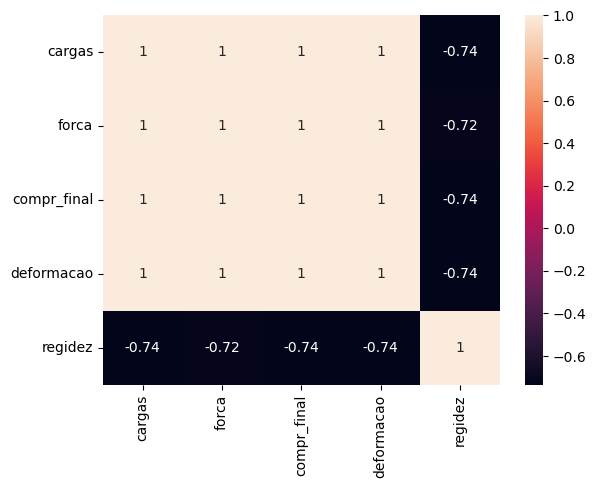

In [179]:
sns.heatmap(mola_trat.corr(),annot= True)
"""
corr() retorna a matriz de correlação entre as variáveis do DataFrame especificado. Por padrão,
essa matriz de correlação é calculada usando o coeficiente de correlação de Pearson.
"""

## Modelo de regreção linear

In [ ]:
## Regressão Linear com Statsmodels

In [189]:
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms

In [192]:
# Criação do modelo
regressao = smf.ols('forca ~ deformacao', data = mola_trat).fit()

"""
Descrição do código:

1) smf.ols: Isso indica que estamos usando a classe ols (Ordinary Least Squares) do módulo statsmodels.
formula.api e que estamos prestes a definir um modelo de regressão linear.
o modelo visa encontrar uma linha reta que melhor descreve a relação entre as duas variáveis.
Ele estima os coeficientes da regressão que representam a interceptação (o valor de "forca" quando "deformacao" é zero) e o coeficiente angular (a mudança na "forca" esperada para uma unidade de mudança em "deformacao").

2) ('forca ~ deformacao'): Essa parte especifica a fórmula do modelo de regressão. 
Neste caso, estamos interessados em prever a variável "forca" com base na variável "deformacao".
O símbolo "~" separa a variável de resposta (forca) das variáveis preditoras (deformacao).

3) data = mola_trat: Aqui, estamos especificando o conjunto de dados no qual o modelo de regressão será ajustado. 
mola_trat é o nome do conjunto de dados que contém as variáveis "forca" e "deformacao".

4) .fit(): Essa chamada de método inicia o processo de ajuste do modelo aos dados.
Ele calcula os coeficientes da regressão e estima os parâmetros do modelo.

"""

In [193]:
#os residuos são o valor obtido menos o valor esperado
residuos = regressao.resid
residuos

0    -0.032776
1    -0.025028
3    -0.026514
4     0.008216
5    -0.029846
6    -0.014350
7     0.025110
8    -0.019394
9     0.033264
10    0.069165
11    0.072589
12   -0.012275
13   -0.001329
14    0.028131
15    0.013852
16   -0.010246
17   -0.009480
18   -0.077902
19   -0.045424
20   -0.019928
21   -0.013126
22    0.009450
23   -0.014387
24    0.054127
25    0.100389
26    0.013093
27    0.012192
28   -0.025127
29   -0.062446
dtype: float64

## PARA VALIDOR O MODELO  1)  Teste de Normalidade dos resíduos

In [195]:
stats.shapiro(residuos)

ShapiroResult(statistic=0.9576568007469177, pvalue=0.2874448597431183)

In [ ]:
#significa que a distribuição vai ser normal se o resultado for maior que 0.05 
#se o resultado for menor ou igual a 0,05 a distribuição não é normal , pvalue=0.2874448597431183 maior que 0,05 então é normal 

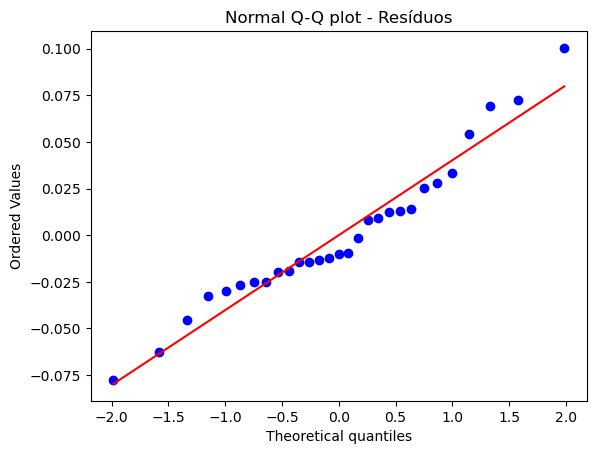

In [196]:
stats.probplot(residuos, dist="norm", plot=plt)
plt.title("Normal Q-Q plot - Resíduos")
plt.show()

## PARA VALIDOR O MODELO  2)  Análise da Homocedasticidade dos resíduos (resíduos com variação constante)

In [197]:
"""
Teste Breusch-Pagan (Homocedasticidade ou heterocedasticidade)  

Ho = existe homocedasticidade : p > 0.05

Ha = não existe homocedasticidade : p <= 0.05
"""

In [198]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [202]:
# neste teste eu vejo o valor de P 
estatistica, p, f, fp = sms.het_breuschpagan (residuos, regressao.model.exog)
print('Estatística de teste: {}'.format(estatistica))
print('p-valor: {}'.format(p))
print('f-valor: {}'.format(f))
print('f_p-valor: {}'.format(fp))

Estatística de teste: 1.358021413197934
p-valor: 0.2438806824610292
f-valor: 1.3264816786252416
f_p-valor: 0.25952885860285974


## PARA VALIDAR O MODELO  3)  Outliers nos resíduos

In [207]:
# (Entre -3 e 3)

In [208]:
outliers = regressao.outlier_test()

In [209]:
outliers.max() #modelo aprovado 2.93 é menor do que 3

student_resid    2.933980
unadj_p          0.973939
bonf(p)          1.000000
dtype: float64

In [215]:
outliers.min() #modelo aprovado 2.09 é menor do que 3

student_resid   -2.092994
unadj_p          0.006904
bonf(p)          0.200227
dtype: float64

## Daqui é que tiramos a equação da reta que faz as "Previsões

In [211]:
#Após validar o Modelo estamos fazendo a regreção com o summary
#utilizando o mesmo modelo que criamos para os testes de validação
regressao.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  forca   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 1.589e+04
Date:                Tue, 13 Jun 2023   Prob (F-statistic):           6.05e-39
Time:                        19:47:55   Log-Likelihood:                 52.994
No. Observations:                  29   AIC:                            -102.0
Df Residuals:                      27   BIC:                            -99.25
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0453      0.014      3.188      0.004       0.016       0.074
deformacao    30.1800      0.239    126.048      0.000      29.689      30.671
==============================================================================
Omnibus:                        3.079   Durbin-Watson:                   1.009
Prob(Omnibus):                  0.215   Jarque-Bera (JB):                1.865
Skew:                           0.595   Prob(JB):                        0.394
Kurtosis:                       3.354   Cond. No.                         32.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [214]:
"""
vemos aqui que: 
a equação de uma reta é Y = Ax + b 

o b é chamado de intercepito , quando o x é 0, ele nos motra a onde a reta intercepta o eixo y 
na tabela summary => Intercept	0.0453

A => coeficiente angular da reta 30.1800

a equação da reta que faz a "previsão" fica ( Força = 0,0436 + 30,2326*deformação )
então para qualquer valor de força que eu definir , eu tenho uma previsão aproximada de deformação

observe que:

Estatística t:

Ho = coeficiente igual a zero : p > 0,05 (coeficiente não validado)
Ha = coeficiente diferente de zero: p <= 0,05 (coeficiente validado)

Obs: o valor que eu estou vendo é a região  P>|t| para a variavel deformação que neste caso é 0 então o modelo está validado

R^2 ajustado = 0,998

Em um modelo de regressão, o R² (R-quadrado) é uma medida estatística que indica a proporção da variabilidade da variável de resposta que é explicada pelas variáveis preditoras do modelo. Em outras palavras, o R² mede o ajuste do modelo aos dados.

O valor do R² varia de 0 a 1, onde:

R² = 0 significa que nenhuma variabilidade da variável resposta é explicada pelas variáveis preditoras, indicando um ajuste inadequado do modelo.
R² = 1 significa que todas as variações da variável resposta são completamente explicadas pelas variáveis preditoras, indicando um ajuste perfeito do modelo.
Em geral, um valor maior de R² indica um melhor ajuste do modelo aos dados. No entanto, é importante considerar o contexto específico e o domínio do problema ao interpretar o R². 
Em alguns casos, um R² alto pode indicar um ajuste excessivo (overfitting) do modelo aos dados de treinamento, o que pode resultar em uma menor capacidade de generalização para novos dados.

Portanto, ao avaliar um modelo de regressão, é recomendável considerar outras métricas de desempenho, além do R², como o erro médio quadrático (RMSE), o erro médio absoluto (MAE) ou realizar uma validação cruzada para uma avaliação mais robusta do modelo.

""" 


'\nvemos aqui que: \na equação de uma reta é Y = Ax + b \n\no b é chamado de intercepito , quando o x é 0, ele nos motra a onde a reta intercepta o eixo y \nna tabela summary => Intercept\t0.0453\n\nA => 30.1800\n\na equação da reta que faz a "previsão" fica ( Força = 0,0436 + 30,2326*deformação )\nentão para qualquer valor de força que eu definir , eu tenho uma previsão aproximada de deformação\n\nobserve que:\n\nEstatística t:\n\nHo = coeficiente igual a zero : p > 0,05 (coeficiente não validado)\nHa = coeficiente diferente de zero: p <= 0,05 (coeficiente validado)\n\nObs: o valor que eu estou vendo é a região  P>|t| para a variavel deformação que neste caso é 0 então o modelo está validado\n\nR^2 ajustado = 0,998\n\nEm um modelo de regressão, o R² (R-quadrado) é uma medida estatística que indica a proporção da variabilidade da variável de resposta que é explicada pelas variáveis preditoras do modelo. Em outras palavras, o R² mede o ajuste do modelo aos dados.\n\nO valor do R² varia 

In [217]:
coefs = pd.DataFrame(regressao.params)
coefs.columns = ['Coeficientes']
print(coefs)

            Coeficientes
Intercept       0.045253
deformacao     30.180043


In [218]:
mola_trat

,cargas,forca,compr_final,deformacao,regidez
0,1,0.10,29.90,0.00290,34.480
1,2,0.15,31.30,0.00430,34.880
3,4,0.23,34.00,0.00700,32.860
4,5,0.31,35.53,0.00850,36.340
5,6,0.45,41.40,0.01440,31.250
6,7,0.55,44.20,0.01720,31.980
7,8,0.68,47.20,0.02020,33.660
8,9,0.72,50.00,0.02300,31.300
9,10,0.83,51.90,0.02490,33.330
10,11,1.05,58.00,0.03100,33.870


In [219]:
mola_trat["FORCA_PREDIC"] = regressao.predict()

""" 
A função predict() é um método que pode ser chamado em um objeto de modelo de regressão para fazer previsões com base em novos dados.
Ele recebe como entrada os valores das variáveis preditoras para as quais você deseja fazer 
previsões e retorna os valores previstos para a variável de resposta correspondente.

neste caso ele esta recebendo a variavel da coluna deformação e prevendo a força , 
veja que a força prevista apreesenta um delta de diferença do que tinhamos como dados , mas é uma diferença pequena na segunda casa após a virgula 
Ex) na primeira linha:  a força dos dados era 0,10 e ele previu 0,13 

"""


In [220]:
mola_trat

,cargas,forca,compr_final,deformacao,regidez,FORCA_PREDIC
0,1,0.10,29.90,0.00290,34.480,0.132776
1,2,0.15,31.30,0.00430,34.880,0.175028
3,4,0.23,34.00,0.00700,32.860,0.256514
4,5,0.31,35.53,0.00850,36.340,0.301784
5,6,0.45,41.40,0.01440,31.250,0.479846
6,7,0.55,44.20,0.01720,31.980,0.564350
7,8,0.68,47.20,0.02020,33.660,0.654890
8,9,0.72,50.00,0.02300,31.300,0.739394
9,10,0.83,51.90,0.02490,33.330,0.796736
10,11,1.05,58.00,0.03100,33.870,0.980835


In [223]:
mola_trat["DELTA_FORCA_PREDIC"] = mola_trat["forca"] -mola_trat["FORCA_PREDIC"]

In [224]:
mola_trat

,cargas,forca,compr_final,deformacao,regidez,FORCA_PREDIC,DELTA_FORCA_PREDIC
0,1,0.10,29.90,0.00290,34.480,0.132776,-0.032776
1,2,0.15,31.30,0.00430,34.880,0.175028,-0.025028
3,4,0.23,34.00,0.00700,32.860,0.256514,-0.026514
4,5,0.31,35.53,0.00850,36.340,0.301784,0.008216
5,6,0.45,41.40,0.01440,31.250,0.479846,-0.029846
6,7,0.55,44.20,0.01720,31.980,0.564350,-0.014350
7,8,0.68,47.20,0.02020,33.660,0.654890,0.025110
8,9,0.72,50.00,0.02300,31.300,0.739394,-0.019394
9,10,0.83,51.90,0.02490,33.330,0.796736,0.033264
10,11,1.05,58.00,0.03100,33.870,0.980835,0.069165


In [ ]:
# Montando o gráfico: utilizando os valores de dados iniciais e plotando a reta da previsão.
#veja como ela se ajusta aos valores 

Text(0.5, 0, 'DEFORMAÇÃO')

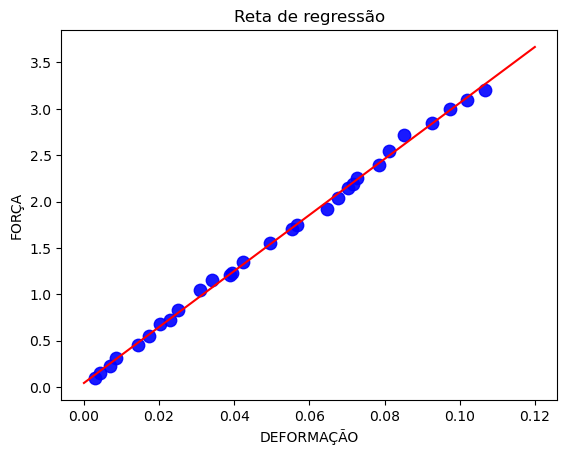

In [226]:
plt.scatter(y=mola_trat.forca, x=mola_trat.deformacao, color='blue', s=80, alpha=0.9)
X_plot = np.linspace(0, 0.12)
plt.plot(X_plot, X_plot*regressao.params[1] + regressao.params[0], color='r')
plt.title('Reta de regressão')
plt.ylabel('FORÇA')
plt.xlabel('DEFORMAÇÃO')


In [231]:
#Observe que o valor que menos se adequa ao modelo é o mesmo que possui 
#aquele maior delta entre a força prevista e a força que tinhamos nos dados

mola_trat["DELTA_FORCA_PREDIC"].max()

0.10038891659812421

In [232]:
mola_trat.loc[mola_trat["DELTA_FORCA_PREDIC"] == 0.10038891659812421 ]

,cargas,forca,compr_final,deformacao,regidez,FORCA_PREDIC,DELTA_FORCA_PREDIC
25,26,2.72,112.3,0.0853,31.89,2.619611,0.100389
